In [31]:
#### Linear regression model using nn.Linear 
### pytorch modelling exercise

In [32]:
import torch
import matplotlib.pyplot as plt
from torch import nn

print(torch.__version__)

1.13.0+cpu


In [33]:
###device agnostic 

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cpu


In [34]:
### creating data frames
### atleast 100 data points

weight = 0.9
bias = 0.3

start, end, step = 0, 1, 0.005

x = torch.arange(start, end, step).unsqueeze(dim=1) #created 200 data points

In [35]:
#### creating training and test data (separately)
train_data = int(0.8 * len(x))

x_train, y_train = x[:train_data], x[:train_data]
x_test, y_test = x[train_data:], x[train_data:]

len(x_train), len(y_train), len(x_test), len(y_test)

(160, 160, 40, 40)

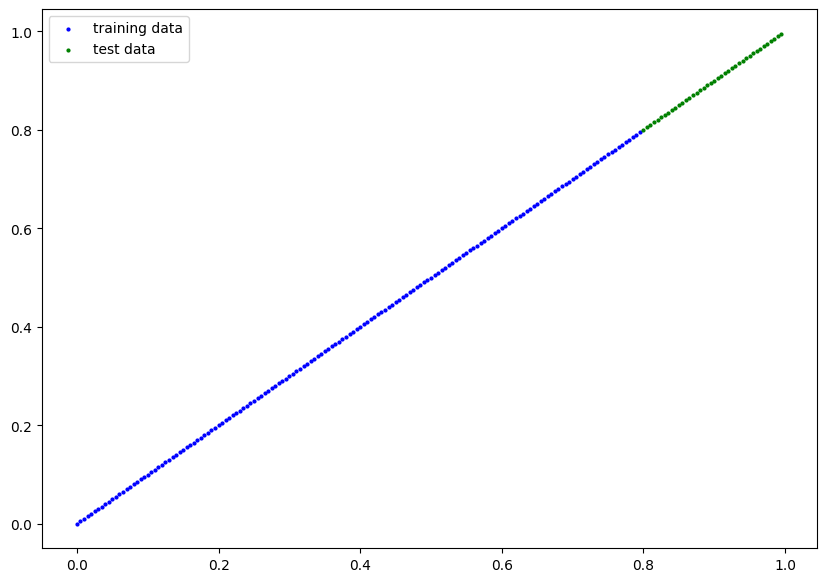

In [36]:
### plot the data

def plot_predictions(x_train = x_train, x_test = x_test, y_train = y_train, y_test=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(x_train, y_train, c='b', s=4, label='training data')
    plt.scatter(x_test, y_test, c='g',s=4, label='test data')
    
    #if predictions not None, plot predictions
    if predictions is not None:
        plt.scatter(x_test, predictions, c='r',s=4, label='predictions data') #in red

    plt.legend();

plot_predictions()

In [37]:
### create model with nn.Linear 


class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        ## using nn.Linear() to create model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)  #calculates y = x* weights + bias


##creating instance of model
torch.manual_seed(0) 
model_1 = LinearRegressionModelV2()  # initialize model with random parameters
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]])),
             ('linear_layer.bias', tensor([0.5364]))])

In [38]:
### change model to available device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [39]:
### TRaining and testing
learning_rate = 0.01

#### loss function 
loss_fn = nn.L1Loss()

##optimizer 
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=learning_rate)


##training 

#epochs 
epochs = 1000

#vars
epoch_count, test_loss_values, train_loss_values = [], [], []

for epoch in range(epochs):
    model_1.train()  #training mode 

    #forward pass
    y_preds = model_1(x_train)

    #calculate loss
    loss = loss_fn(y_preds, y_train)

    #no grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #step the optimizer
    optimizer.step()

    ####TESTING 
    model_1.eval() #evaluation mode

    #forward pass
    with torch.inference_mode():

        y_pred_test = model_1(x_test)

        #loss calculation
        test_loss = loss_fn(y_pred_test, y_test)

    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch}, Train Loss: {loss}, Test Loss: {test_loss}")

Epoch: 0, Train Loss: 0.22443461418151855, Test Loss: 0.3707643151283264
Epoch: 20, Train Loss: 0.20797988772392273, Test Loss: 0.41060638427734375
Epoch: 40, Train Loss: 0.19826392829418182, Test Loss: 0.42508190870285034
Epoch: 60, Train Loss: 0.19055047631263733, Test Loss: 0.42577090859413147
Epoch: 80, Train Loss: 0.18345768749713898, Test Loss: 0.418759822845459
Epoch: 100, Train Loss: 0.17654548585414886, Test Loss: 0.40739917755126953
Epoch: 120, Train Loss: 0.16968049108982086, Test Loss: 0.3936116099357605
Epoch: 140, Train Loss: 0.16283904016017914, Test Loss: 0.3782649338245392
Epoch: 160, Train Loss: 0.1559976041316986, Test Loss: 0.36291831731796265
Epoch: 180, Train Loss: 0.14915618300437927, Test Loss: 0.3475717008113861
Epoch: 200, Train Loss: 0.14231474697589874, Test Loss: 0.3322250247001648
Epoch: 220, Train Loss: 0.13547329604625702, Test Loss: 0.31687843799591064
Epoch: 240, Train Loss: 0.1286318600177765, Test Loss: 0.3015317916870117
Epoch: 260, Train Loss: 0.12

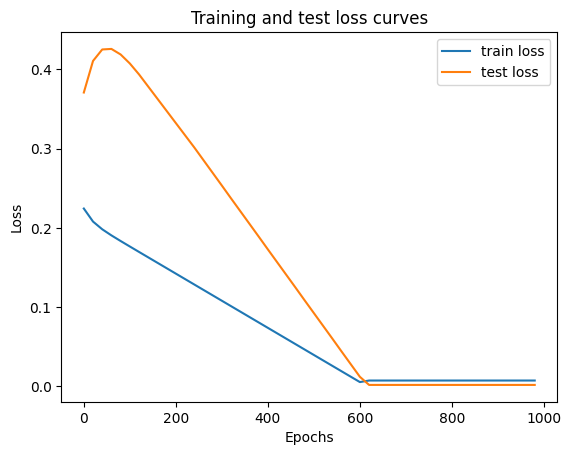

In [40]:
### plot predictions
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [41]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.9917]])), ('linear_layer.bias', tensor([-0.0042]))])

And the original values for weights and bias are:
weights: 0.9, bias: 0.3


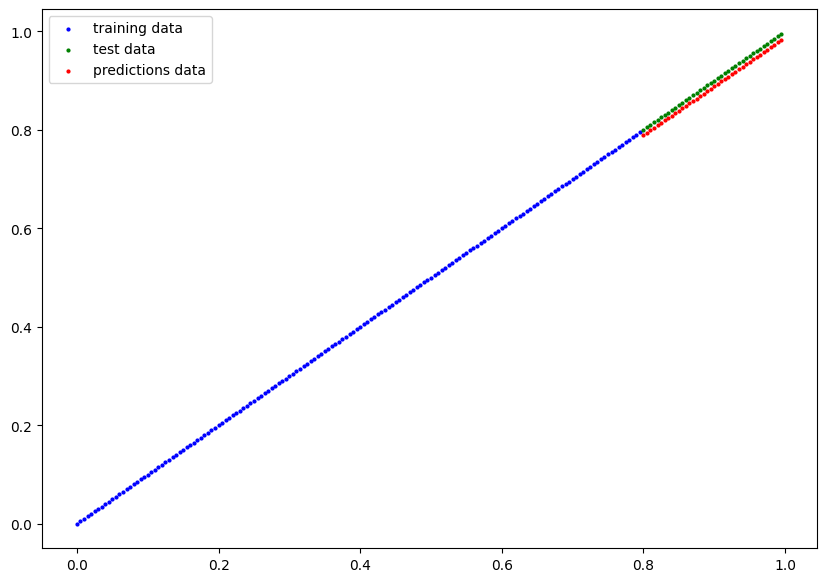

In [42]:
## testing our predictions

with torch.inference_mode():
    y_preds = model_1(x_test)

plot_predictions(predictions= y_preds)

In [43]:
from pathlib import Path

##saving my model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "LinearRegressionModelV2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#SAVE MODEL
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)



saving model to: models\LinearRegressionModelV2.pth


In [44]:
###loading our model
loaded_model_1 = LinearRegressionModelV2()

##update parameters
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(f"loaded model: {list(loaded_model_1.parameters())}")

loaded model: [Parameter containing:
tensor([[0.9917]], requires_grad=True), Parameter containing:
tensor([-0.0042], requires_grad=True)]


In [45]:
###testing my loaded model
loaded_model_1.eval()

with torch.inference_mode():
    y_test_preds = loaded_model_1(x_test)

y_test_preds == y_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])